# Clustering
## วรัชญ์ จังวัฒนกุล 6030821521

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
dataframe = pd.read_excel('Fire_Data.xlsx')

In [3]:
dataframe

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [4]:
dataframe['ACQ_DATE']

0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2019-12-01
           ...    
79229   2020-04-04
79230   2020-04-04
79231   2020-04-04
79232   2020-04-04
79233   2020-04-04
Name: ACQ_DATE, Length: 79234, dtype: datetime64[ns]

In [5]:
dataframe.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [6]:
dataframe['Convert_DATE'] = pd.to_datetime(dataframe['ACQ_DATE']).astype(np.int64)


In [7]:
dataframe['HOUR'] = pd.to_datetime(dataframe['ACQ_TIME']/100).astype(np.int64)


In [8]:
dataframe['MIN'] = pd.to_datetime(dataframe['ACQ_TIME']%100).astype(np.int64)


In [9]:
dataframe['ACQ_DATETIME'] = pd.to_datetime(dataframe['Convert_DATE']+(dataframe['HOUR']*60*60e9)+(dataframe['MIN']*60e9)).astype(np.int64)


In [10]:
dataframe['zAxis'] = pd.to_datetime(((dataframe['ACQ_DATETIME']/(60e9))-26252640)).astype(np.int64)


In [11]:
dataframe['ZAxis'] = pd.to_datetime(((dataframe['ACQ_DATETIME']/(60e9))-26252640)/1440).astype(np.int64)


In [12]:
dataframe['Convert_ACQ_DATETIME'] = pd.to_datetime(dataframe.ACQ_DATETIME)

In [13]:
print(dataframe)

       OBJECTID  LATITUDE  LONGITUDE  BRIGHT_TI4  SCAN  TRACK   ACQ_DATE  \
0             1  16.33696   98.70137       334.5  0.39   0.36 2019-12-01   
1             2  16.48906   98.73961       343.2  0.39   0.36 2019-12-01   
2             3  16.93571   99.06874       339.4  0.39   0.36 2019-12-01   
3             4  16.54092   98.59869       343.2  0.39   0.36 2019-12-01   
4             5  16.87473   98.63222       331.1  0.39   0.36 2019-12-01   
...         ...       ...        ...         ...   ...    ...        ...   
79229     79230  17.81812   97.74127       347.4  0.78   0.78 2020-04-04   
79230     79231  17.77545   97.85637       306.5  0.79   0.78 2020-04-04   
79231     79232  17.76847   97.79116       305.7  0.79   0.78 2020-04-04   
79232     79233  17.77518   97.82606       306.1  0.79   0.78 2020-04-04   
79233     79234  18.46766   97.94600       301.3  0.78   0.78 2020-04-04   

       ACQ_TIME SATELLITE INSTRUMENT  ... BRIGHT_TI5  FRP  TYPE  \
0           635     

In [14]:
dataframe2 = dataframe[["LATITUDE","LONGITUDE","zAxis"]].head(1000)
dataframe2

,LATITUDE,LONGITUDE,zAxis
0,16.33696,98.70137,395
1,16.48906,98.73961,395
2,16.93571,99.06874,395
3,16.54092,98.59869,395
4,16.87473,98.63222,395
...,...,...,...
995,16.49264,98.73539,14808
996,18.40293,100.43764,14808
997,17.37818,99.13098,14808
998,18.85814,99.63300,14808


In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

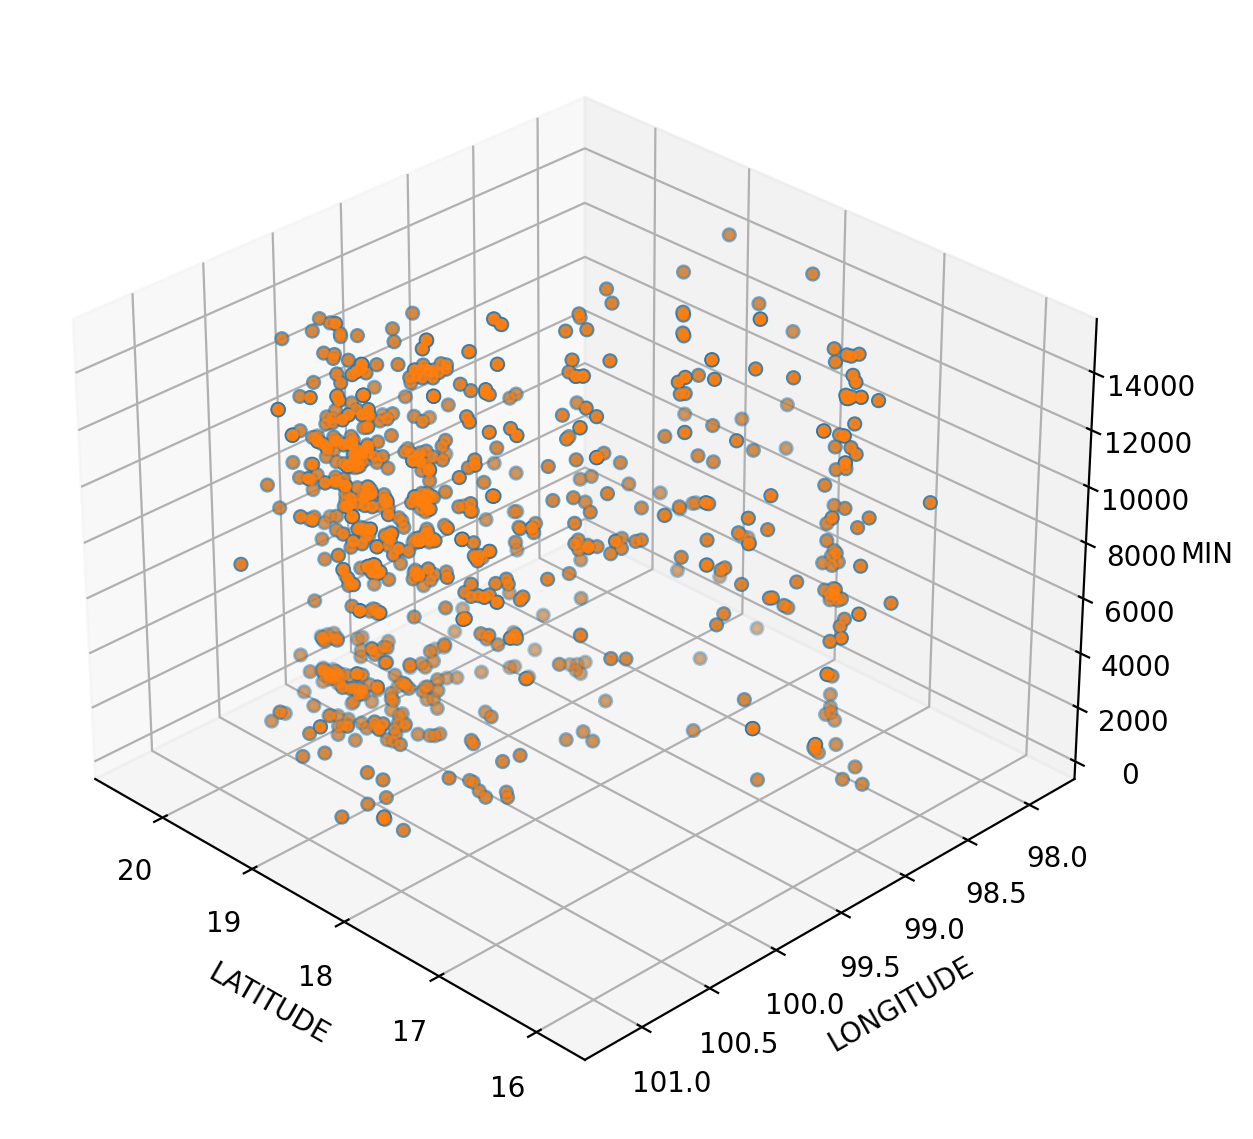

In [16]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x=dataframe2['LATITUDE']
y=dataframe2['LONGITUDE']
z=dataframe2['zAxis']
ax.scatter(x,y,z)
ax.view_init(azim=135)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('MIN')
pnt3d=ax.scatter(x,y,z,s=10)

plt.show()

In [17]:
a = np.array(dataframe2.values.tolist())
a

array([[   16.33696,    98.70137,   395.     ],
       [   16.48906,    98.73961,   395.     ],
       [   16.93571,    99.06874,   395.     ],
       ...,
       [   17.37818,    99.13098, 14808.     ],
       [   18.85814,    99.633  , 14808.     ],
       [   18.56677,    99.25777, 14808.     ]])

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

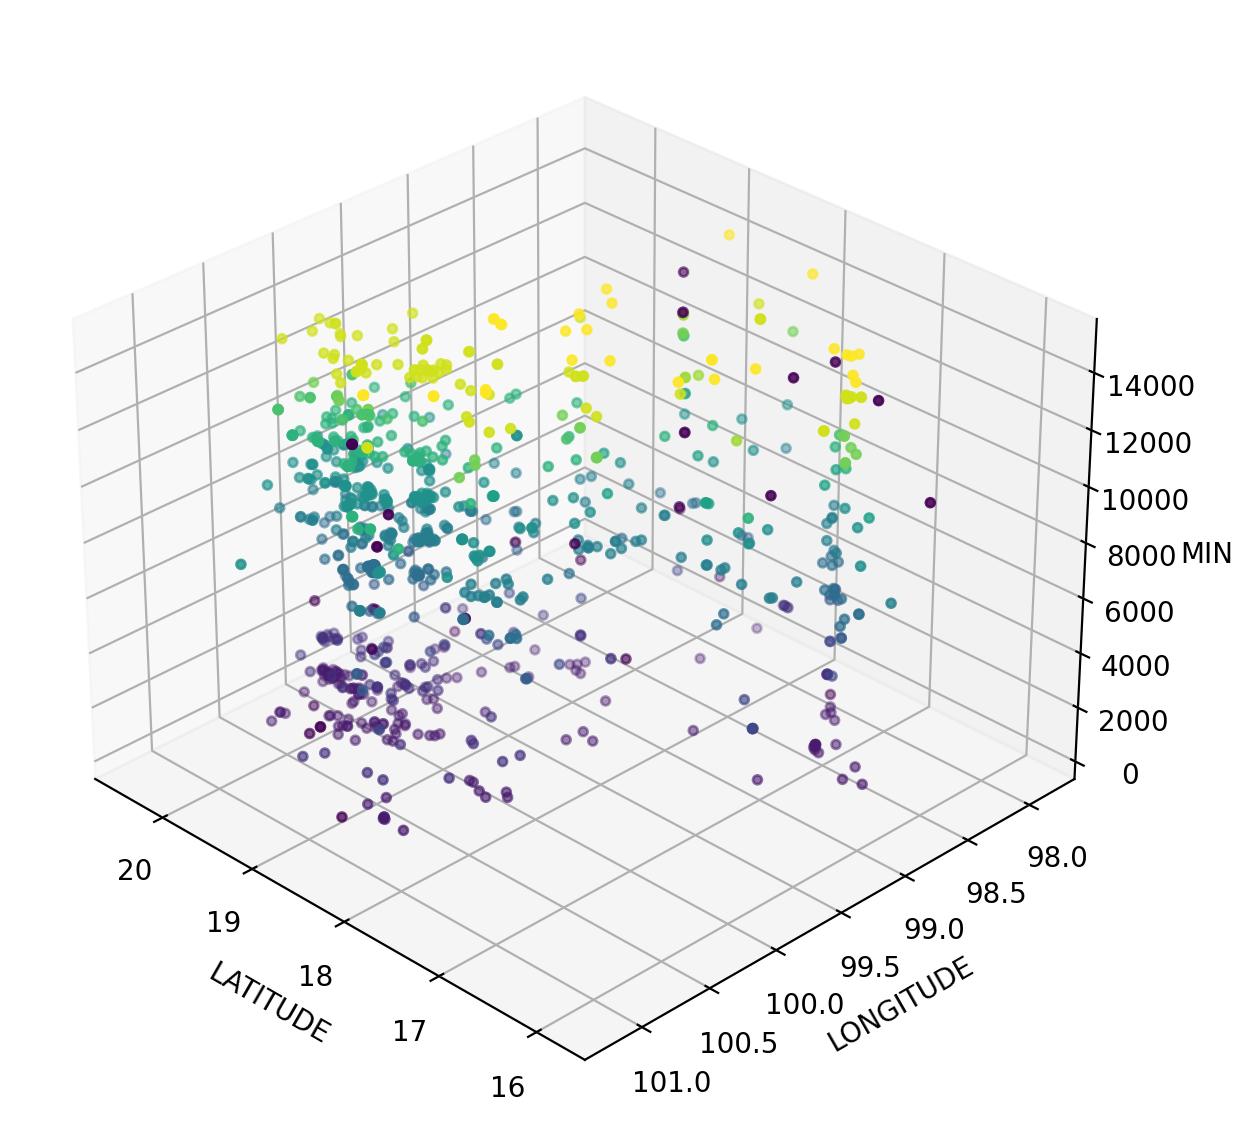

In [19]:
model = DBSCAN(eps=2, min_samples=5).fit(dataframe2)
model.fit_predict(dataframe2)
pred = model.fit_predict(dataframe2)

fig = plt.figure()
axes = Axes3D(fig)
axes.scatter(a[:,0], a[:,1], a[:,2], c=model.labels_, s=10)
axes.view_init(azim=135)
axes.set_xlabel('LATITUDE')
axes.set_ylabel('LONGITUDE')
axes.set_zlabel('MIN')
plt.show()

In [20]:
model_label = model.labels_
model_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(dataframe2,model_label)

0.9251223722622571

ใช้เทคนิค DBSCAN โดยกำหนดการตั้งค่า eps=2 และ min_sample=5 เพราะค่า eps จะแปรผันตรงกับรัศมีของข้อมูลที่เรานำมาพิจารณา ส่วน min_sample เราจะประมาณไว้ที่ 5 โดยเราพิจารณาว่าหากค่ามีการรวมตัวน้อยกว่า 5 เราจะไม่จัดว่าค่าเหล่านั้นเป็นกลุ่ม ซึ่งผลลัพธ์ที่ได้ silhouette_score = 0.9251223722622571 ซึ่งมีค่าเข้าใกล้ 1 หมายความว่าการจัดกลุ่มนี้เป็นไปอย่างเหมาะสม คือมีระยะใกล้เคียงกับสมาชิกกลุ่มเดียวกันและห่างจากสมาชิกกลุ่มอื่น ๆ ซึ่งจุดสีม่วงในกราฟคือ outliers